# **Image Classification**

**Source:**

https://www.codecademy.com/learn/deep-learning-with-tensor-flow-image-classification/modules/image-classification-deep-learning-with-tensorflow/cheatsheet


**Dataset:**

We will be using the [Chest X-Ray (Pneumonia) dataset]( https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
). Approximately 6000 chest x-rays, each annotated as ‘NORMAL’ or ‘PNEUMONIA.’


**Objectives:**

- Using Keras to preprocess and load image data.
- Using Convolutional Neural Networks to classify images, and showcase why CNNs outperform feed-forward models which are based on linear layers.
- Adjusting the filter dimensions, stride, and padding of a convolutional layer, and showcasing how these hyperparameters affect output size.
- Use pooling methods to further reduce the size of our hidden layers and gain some spatial invariance properties.


### Basic Definitions: 
**Image classification:** the task of finding the complex patterns in pixels necessary to map an image to its label.

**Convolutional layers:** layers designed to process image data by focusing on local relationships between features.

## Preprocessing Image Data
Our goal is to pass these X-ray images into our network, and to classify them according to their respective labels. At a high-level, this is very similar to how we would approach classifying non-image data.
But for our image data, our features are going to come from image pixels. Each image will be 256 pixels tall and 256 pixels wide, and each pixel has a value between 0 (black) - 255 (white).

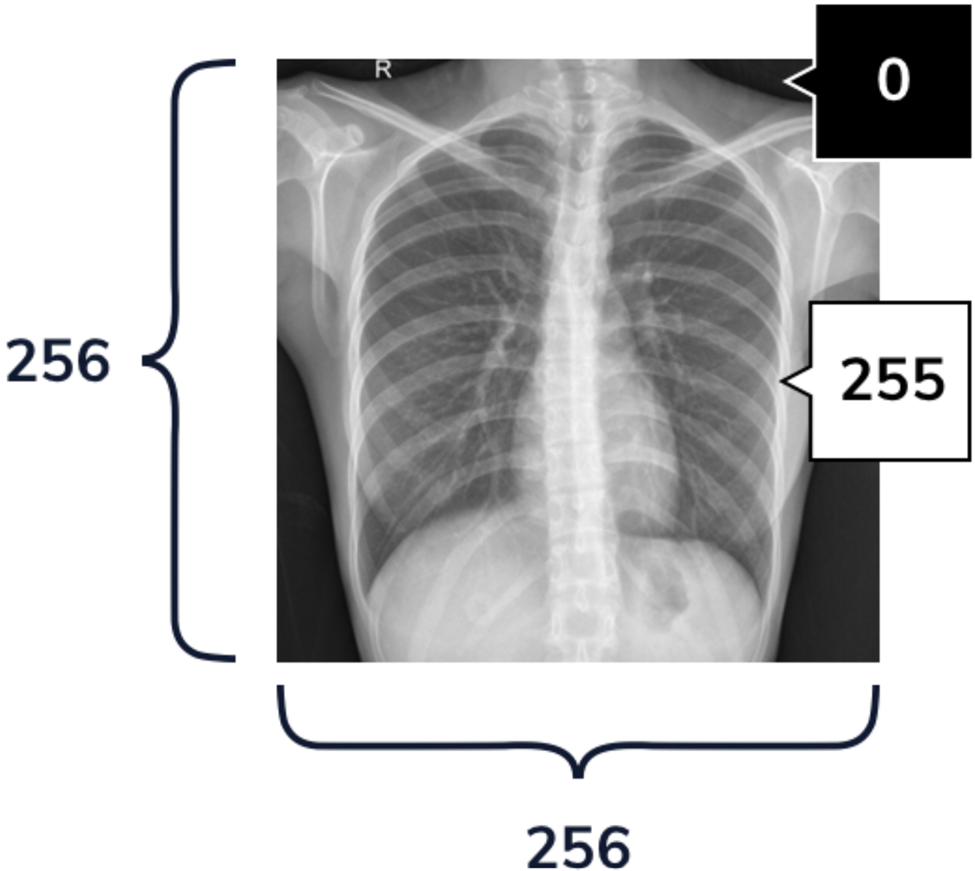

## Required Installation 

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install import-ipynb

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import import_ipynb

In [4]:
from preprocess import *

In [5]:
import preprocess

## Loading and Preprocessing Image Data with Keras

Keras provides us with a [few tools]( https://keras.io/api/data_loading/image/) to make the process less burdensome:
-	```ImageDataGenerators```: Used to load images from a file path, and to preprocess them, and we do this by passing additional arguments to the constructor. 
We can constuctor an ```ImageDataGenerator``` using the following code:
```
my_image_data_generator = ImageDataGenerator()
```
### Preprocessing 
-	pixel normalization: Neural networks struggle with large integer values, and we want to rescale our raw pixel values between ```0```and ```1```. Our pixels have values in ```[0,255]```, so we can normalize pixels by dividing each pixel by ```255.0```.

-	data augmentation: generating more data without collecting any new images. A common way to augment image data is to flip or randomly shift each image by small amounts.
```
my_augmented_image_data_generator = ImageDataGenerator( vertical_flip = True )
```


## Creating an Image Generator 

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Creates an ImageDataGenerator:
training_data_generator = ImageDataGenerator(


       rescale=1.0/255,
        #Randomly increase or decrease the size of the image by up to 20%
       zoom_range=0.2, 

        #Randomly rotate the image between -15,15 degrees
       rotation_range=15, 

        #Shift the image along its width by up to +/- 5%
       width_shift_range=0.05, 

        #Shift the image along its height by up to +/- 5%
       height_shift_range=0.05 
)
#Prints its attributes:
print(training_data_generator.__dict__)

{'featurewise_center': False, 'samplewise_center': False, 'featurewise_std_normalization': False, 'samplewise_std_normalization': False, 'zca_whitening': False, 'zca_epsilon': 1e-06, 'rotation_range': 15, 'width_shift_range': 0.05, 'height_shift_range': 0.05, 'shear_range': 0.0, 'zoom_range': [0.8, 1.2], 'channel_shift_range': 0.0, 'fill_mode': 'nearest', 'cval': 0.0, 'horizontal_flip': False, 'vertical_flip': False, 'rescale': 0.00392156862745098, 'preprocessing_function': None, 'dtype': 'float32', 'interpolation_order': 1, 'data_format': 'channels_last', 'channel_axis': 3, 'row_axis': 1, 'col_axis': 2, '_validation_split': 0.0, 'mean': None, 'std': None, 'zca_whitening_matrix': None, 'brightness_range': None}


## Loading Image Data


Now, we can use the ImageDataGenerator object that we just created to load and batch our data, using its .flow_from_directory() method.

Let’s consider each of its arguments:

- <code>directory</code> : A string that defines the path to the folder containing our training data.
- <code>class_mode</code> : How we should represent the labels in our data. “For example, we can set this to "categorical" to return our labels as one-hot arrays, with a 1 in the correct class slot.
- <code>color_mode</code> : Specifies the type of image. For example, we set this to "grayscale" for black and white images, or to "rgb" (Red-Green-Blue) for color images.
- <code>target_size</code> : A tuple specifying the height and width of our image. Every image in the directory will be resized into this shape.
- <code>batch_size</code> : The batch size of our data.
The resulting training_iterator variable is a DirectoryIterator object. We can pass this object directly to model.fit() to train our model on our training data.



When we train our model, we will be using a categorical loss function, which will expect labels to be in a onehot format. For example, a picture in the PNEUMONIA folder should be labeled <code>[0,1]</code>, and picture in the NORMAL folder should be labeled <code>[1,0]</code>.

Set <code>CLASS_MODE</code> to be "<code>categorical</code>" to specify this behavior.

In [7]:
import preprocess

DIRECTORY = "data/train"
CLASS_MODE = "categorical"
TARGET_SIZE = (256,256)
BATCH_SIZE = 32

we need to set color_mode. One might call our chest x-ray images “black and white,” but really these images are composed of pixels that can be any shade of gray, from white to black. The term for this type of image is grayscale. In contrast, color images are usually made of three stacked “images” or channels: one of Red pixels, another of Green pixels, and a third of Blue pixels.

Set COLOR_MODE to be "grayscale". This tells the DirectoryIterator to load each image as gray pixels.

In [8]:
import preprocess

DIRECTORY = "data/train"
CLASS_MODE = "categorical"
COLOR_MODE = "grayscale"
TARGET_SIZE = (256,256)
BATCH_SIZE = 32

Once we have used these parameters to create our DirectoryIterator, we can iterate over the training batches using the .next() method. The resulting ```training_iterator``` variable is a ```DirectoryIterator``` object. We can pass this object directly to ```model.fit()``` to train our model on our training data.

In [9]:
import preprocess

DIRECTORY = "data/train"
CLASS_MODE = "categorical"
COLOR_MODE = "grayscale"
TARGET_SIZE = (256,256)
BATCH_SIZE = 32



training_iterator = training_data_generator.flow_from_directory(
    DIRECTORY,class_mode=CLASS_MODE,color_mode=COLOR_MODE,
    target_size=TARGET_SIZE,batch_size=BATCH_SIZE)

Found 3284 images belonging to 3 classes.


The sample_batch_input shape should be ( 32, 256, 256, 1). This is because there are 32 images in a batch, and each is a 256x256 pixel grayscale image. The last dimension is the number of channels. Because these are grayscale images, there is only one channel representing light intensity.

Sample_batch_labels should be shape of (32,2), because an image can be labeled Normal ([1,0]) or Pneumonia ([0,1]).

# Modifying our Feed-Forward Classification Model


We will use model.add() to add two layers to the model:

-	By first, adding an tf.keras.Input() layer. (we will set its shape parameter for 256x256 grayscale images).
-	And then adding a tf.keras.layers.Flatten() layer after the input layer. This will automatically flatten our 256x256 pixel input images into 1-dimensional arrays of length 256x256=65536 features.

We add a ```Flatten()``` layer to “flatten” our input image into a single vector. Kera’s ```Flatten()``` layer allows us to preserve the batch size of data, but combine the other dimensions of the image (height, width, image channels) into a single, lengthy feature vector. We can then pass this output to a ```Dense()``` layer.



In [10]:
import tensorflow as tf

model = tf.keras.Sequential()

#Add an input layer that will expect grayscale input images of size 256x256:

#model.add(...)

#Use a Flatten() layer to flatten the image into a single vector:

#model.add(...)

# Add an input layer that expects grayscale input images of size 256x256:
model.add(tf.keras.Input(shape=(256, 256, 1)))

# Use a Flatten() layer to flatten the image into a single vector:
model.add(tf.keras.layers.Flatten()) 

model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(50,activation="relu"))
model.add(tf.keras.layers.Dense(2,activation="softmax"))

#Print model information:
#model.summary() 


Model Output Layer: The output layer of your model must match the number of classes:

- Use Dense(1, activation='sigmoid') for binary classification (two classes).
- Use Dense(2, activation='softmax') if you prefer to frame it as a multi-class problem with two outputs, but it's less efficient.
- Use Dense(n, activation='softmax') for multi-class classification with more than two classes.

Note that even though our model only has three hidden layers, it already has a whopping 6.5 million trainable parameters. This means that we have over 1000x more parameters than data points! As a result this model will not only take a significant amount of compute to train, but it will also easily overfit to our training data.

The problem here is the size of our input. When we have flattened our image, we end up with an input of size 65536 features. We then need a matrix of size [65536 by 100] to transform this input into a layer with 100 units! This feed-forward model will struggle to learn meaningful combinations of so many features for those next hidden units.

That is why we will be using convolutional layers. These layers allow us to scale down our input image into meaningful features while using only a fraction of the parameters required in a linear layer.

# Convolutional Layer 

Convolutional Neural Networks (CNNs) use layers specifically designed for image data. These layers capture local relationships between nearby features in an image.

Previously, in our feed-forward model, we multiplied our normalized pixels by a large weight matrix (of shape ```(65536, 100)```) to generate our next set of features.

However, when we use a convolutional layer, we learn a set of smaller weight tensors, called filters (also known as kernels). We move each of these filters (i.e. convolve them) across the height and width of our input, to generate a new “image” of features. Each new “pixel” results from applying the filter to that location in the original image.

**Why do convolution-based approaches work well for image data?**

- Convolution can reduce the size of an input image using only a few parameters.
  
- Filters compute new features by only combining features that are near each other in the image. This operation encourages the model to look for local patterns (e.g., edges and objects).

- Convolutional layers will produce similar outputs even when the objects in an image are translated (For example, if there were a giraffe in the bottom or top of the frame). This is because the same filters are applied across the entire image.

Before deep nets, researchers in computer vision would hand design these filters to capture specific information. For example, a 3x3 filter could be hard-coded to activate when convolved over pixels along a vertical or horizontal edge:

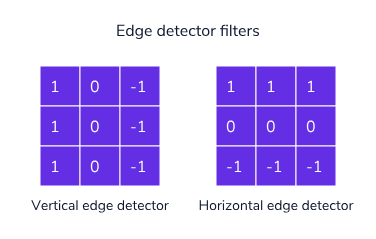

However, with deep nets, we can learn each weight in our filter (along with a bias term)! As in our feed-forward layers, these weights are learnable parameters. Typically, we randomly initialize our filters and use gradient descent to learn a better set of weights. By randomly initializing our filters, we ensure that different filters learn different types of information, like vertical versus horizontal edge detectors.



# Configuring a Convolutional Layer - Filters
In Keras, we can define a Conv2D layer to handle the forward and backward passes of convolution.

```
#Defines a convolutional layer with 4 filters, each of size 5 by 5:

tf.keras.layers.Conv2D(4, 5, activation="relu"))  
```

When defining a convolutional layer, we can specify the number and size of the filters that we convolve across each image.

Number of Filters
When using convolutional layers, we don’t just convolve one filter. Instead, we define some number of filters. We convolve each of these in turn to produce a new set of features. Then we stack these outputs (one for each filter) together in a new “image.”


Our output tensor is then ```(batch_size, new height, new width, number of filters)```. We call this last dimension number of channels ( or feature maps ). These are the result of applying a single filter across the entire image.


### Filter Size

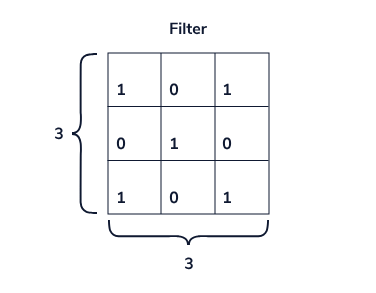

Beyond configuring the number of filters, we can also configure their size. Each filter has three dimensions: [Height, Width, Input Channels]

- Height: the height of our filter (in pixels)
  
- Width: the width of our filter (also in pixels)

  
- Input Channels: The number of input channels. In a black and white image, there is 1 input channel (grayscale). However, in an RGB image, there are three input channels. Note that we don’t have control over this dimension (it depends on the input), and Keras takes care of this last dimension for us.

  
Increasing height or width increases the number of pixels that a filter can pay attention to at each step in the convolution. However, doing so also increases the number of learnable parameters. People commonly use filters of size 5x5 and 3x3.

In total, the number of parameters in a convolution layer is:


***Number of filters×(Input Channels × Height × Width+1)***

Every filter has height, width, and thickness (The number of input channels), along with a bias term.


The code below creates a model with only one convolutional layer. This convolutional layer has 8 filters, and each is 3x3.

In [11]:
print("\n\nModel with 8 filters:")

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(256, 256, 1)))

#Adds a Conv2D layer with 8 filters, each size 3x3:
model.add(tf.keras.layers.Conv2D(8, 3,activation="relu"))
model.summary()
"""
print("\n\nModel with 16 filters:")

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(256, 256, 1)))

#Adds a Conv2D layer with 16 filters, each size 3x3:
model.add(tf.keras.layers.Conv2D(16, 3,activation="relu"))
model.summary()

print("\n\nModel with 16 filters:")

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(256, 256, 1)))

#Adds a Conv2D layer with 16 filters, each size 3x3:
model.add(tf.keras.layers.Conv2D(16, 3,activation="relu"))
model.summary()

print("\n\nModel with 16 filters:")

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(256, 256, 1)))

#Adds a Conv2D layer with 16 filters, each size 7x7:
model.add(tf.keras.layers.Conv2D(16, 7,activation="relu"))
model.summary()
"""



Model with 8 filters:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 8)         │              80 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80 (320.00 B)

 Trainable params: 80 (320.00 B)

 Non-trainable params: 0 (0.00 B)

'\nprint("\n\nModel with 16 filters:")\n\nmodel = tf.keras.Sequential()\nmodel.add(tf.keras.Input(shape=(256, 256, 1)))\n\n#Adds a Conv2D layer with 16 filters, each size 3x3:\nmodel.add(tf.keras.layers.Conv2D(16, 3,activation="relu"))\nmodel.summary()\n\nprint("\n\nModel with 16 filters:")\n\nmodel = tf.keras.Sequential()\nmodel.add(tf.keras.Input(shape=(256, 256, 1)))\n\n#Adds a Conv2D layer with 16 filters, each size 3x3:\nmodel.add(tf.keras.layers.Conv2D(16, 3,activation="relu"))\nmodel.summary()\n\nprint("\n\nModel with 16 filters:")\n\nmodel = tf.keras.Sequential()\nmodel.add(tf.keras.Input(shape=(256, 256, 1)))\n\n#Adds a Conv2D layer with 16 filters, each size 7x7:\nmodel.add(tf.keras.layers.Conv2D(16, 7,activation="relu"))\nmodel.summary()\n'

# Configuring a Convolutional Layer - Stride and Padding


Two other hyperparameters in a convolutional layer are Stride and Padding.

**Stride**

The stride hyperparameter is how much we move the filter each time we apply it. The default stride is 1, meaning that we move the filter across the image 1-pixel at a time. When we reach the end of a row in the image, we then go to the next one.


If we use a stride greater than 1, we do not apply our filter centered on every pixel. Instead, we move the filter multiple pixels at a time.


Larger strides allow us to decrease the size of our output. In the case where our stride=2, we apply our filter to every other pixel. As a result, we will halve the height and width of our output.

A Conv2D layer with a stride of ```3``` (with 8 filters, each size 5x5):
```
model.add(tf.keras.layers.Conv2D(8, 5,
strides=3,
activation="relu"))
```

**Padding**

The padding hyperparameter defines what we do once our filter gets to the end of a row/column. In other words: “what happens when we run out of image?” There are two main methods for what to do here:

- We just stop (valid padding): The default option is to just stop when our kernel moves off the image. Let’s say we are convolving a ```3x3``` filter across a ```7x7``` image with ```stride=1```. Our output will then be a ```5x5``` image, because we can’t process the 6th pixel without our filter hanging off the image.
- We keep going (same padding): Another option is to pad our input by surrounding our input with zeros. In this case, if we add zeros around our ```7x7``` image, then we can apply the ```3x3``` filter to every single pixel. This approach is called “same” padding, because if ```stride=1```, the output of the layer will be the same height and width as the input.

We can use “same” padding by setting the padding parameter:

```
model.add(tf.keras.layers.Conv2D(8, 5,
strides=3,
padding='same',
activation="relu"))
```

### Change the number of strides to 2:

In [12]:
print("Model with 16 filters:")

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(256, 256, 1)))

#Adds a Conv2D layer with 16 filters, each size 7x7, and uses a stride of 1 with valid padding:
model.add(tf.keras.layers.Conv2D(16, 7,
strides=2,
padding="valid",
activation="relu"))
model.summary()

Model with 16 filters:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 16)        │             800 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 800 (3.12 KB)

 Trainable params: 800 (3.12 KB)

 Non-trainable params: 0 (0.00 B)

### Change the padding type to be "same", and set strides equal to 1.

In [13]:
print("Model with 16 filters:")

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(256, 256, 1)))

#Adds a Conv2D layer with 16 filters, each size 7x7, and uses a stride of 1 with valid padding:
model.add(tf.keras.layers.Conv2D(16, 7,
strides=1,
padding="same",
activation="relu"))
model.summary()

Model with 16 filters:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 256, 256, 16)        │             800 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 800 (3.12 KB)

 Trainable params: 800 (3.12 KB)

 Non-trainable params: 0 (0.00 B)

# Adding Convolutional Layers to Your Model

Adding One Convolutional Layer
Now, we can modify our feed-forward image classification code to use a convolutional layer:

- First, we are going to replace the first two Dense layers with a Conv2D layer
  
- Then, we want to move the Flatten layer between the convolutional and last dense layer. Because dense layers apply their matrix to the dimension, we will always need to flatten the output of convolutional layers before passing them into a dense layer.


**Stacking Convolutional Layers**

With neural networks we can stack many layers to learn richer combinations of features.We can stack convolutional layers the same way we stacked dense layers.


```
# 8 5x5 filters, with strides of 3
model.add(tf.keras.layers.Conv2D(8, 5, strides=3, activation="relu"))

# 4 3x3 filters, with strides of 3
model.add(tf.keras.layers.Conv2D(4, 3, strides=3, activation="relu"))

# 2 2x2 filters, with strides of 2
model.add(tf.keras.layers.Conv2D(2, 2, strides=2, activation="relu"))
```

Like with dense layers, the output of one convolutional layer can be passed as input to another. You can think of the output as a new input “image,” with a height, width, and number of channels. The number of filters used in the previous layer becomes the number of channels that we input into the next!

As with dense layers, we should use non-linear activation functions between these convolutional layers.





### First, add a Conv2D layer after the Input layer.

- Use 2 filters of size 5
- A stride of 3
- "valid" padding
- A relu activation

Then, delete the first two Denselayers.


### Then, let’s try stacking another Conv2D layer.

After you first Conv2D layer, add another with:

- 4 filters of size 3
- A stride of 1
- "valid" padding
- A relu activation

In [14]:
model = tf.keras.Sequential()


model.add(tf.keras.Input(shape=(256,256,1)))

#Add a Conv2D layer
# - with 2 filters of size 5x5
# - strides of 3
# - valid padding

model.add(tf.keras.layers.Conv2D(2, 5, strides=3, padding="valid", activation="relu"))

model.add(tf.keras.layers.Conv2D(4, 3, strides=1, padding="valid", activation="relu"))

model.add(tf.keras.layers.Flatten())

#Remove these two dense layers:
# model.add(tf.keras.layers.Dense(100,activation="relu"))
# model.add(tf.keras.layers.Dense(50,activation="relu"))

model.add(tf.keras.layers.Dense(3,activation="softmax"))

#Print model information:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 84, 84, 2)           │              52 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 82, 82, 4)           │              76 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 26896)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │          80,691 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,819 (315.70 KB)

 Trainable params: 80,819 (315.70 KB)

 Non-trainable params: 0 (0.00 B)

# Pooling

Another part of Convolutional Networks is Pooling Layers: layers that pool local information to reduce the dimensionality of intermediate convolutional outputs.

There are many different types of pooling layer, but the most common is called Max pooling:

- Like in convolution, we move windows of specified size across our input. We can specify the stride and padding in a max pooling layer.
- However, instead of multiplying each image patch by a filter, we replace the patch with its maximum value.

For example, we can define a max pooling layer that will move a ```3x3``` window across the input, with a stride of ```3``` and ```valid``` padding:

```
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(3, 3),   strides=(3, 3), padding='valid')

```

Beyond helping reduce the size of hidden layers (and reducing overfitting), max pooling layers have another useful property: they provide some amount of translational invariance. In other words, even if we move around objects in the input image, the output will be the same. This is very useful for classification. For example, we usually want to classify an image of a cat as a cat, regardless of how the cat is oriented in the image.

## Let’s add max pooling layers and train the model. Try adding two max pooling layers.

- First, define a <code>MaxPooling2D</code> layer with:

<code>pool_size</code> equal to <code>(5,5)</code>

<code>strides</code> equal to <code>(5,5)</code>

Place this layer after the first convolutional layer.

- Second, define a <code>MaxPooling2D</code> layer with:

<code>pool_size</code> equal to <code>(2,2)</code>

<code>strides</code> equal to <code>(2,2)</code>

Place this layer immediately after the second convolutional layer.

In [15]:
model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=(256,256,1)))

model.add(tf.keras.layers.Conv2D(2,5,strides=3,padding="valid",activation="relu"))

#Add first max pooling layer here.

#model.add(...)
model.add(tf.keras.layers.MaxPooling2D(pool_size=(5, 5), strides=(5,5)))

model.add(tf.keras.layers.Conv2D(4,3,strides=1,padding="valid",activation="relu"))

#Add the second max pooling layer here.

#model.add(...)
model.add(tf.keras.layers.MaxPooling2D( pool_size=(2,2), strides=(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(3,activation="softmax"))

#Print model information:
model.summary() 



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 84, 84, 2)           │              52 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 2)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 4)           │              76 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 196)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 719 (2.81 KB)

 Trainable params: 719 (2.81 KB)

 Non-trainable params: 0 (0.00 B)

# Training the Model


Now, we are going to put everything together and train our model!

We have to do three additional things:

- Define another <CODE>ImageDataGenerator</CODE> and use it to load our validation data.
- Compile our model with an optimizer, metric, and a loss function.
- Train our model using <CODE>model.fit()</CODE>.

###  Validation Data Generator
We have already defined an ```ImageDataGenerator``` called ```training_data_generato```. Like in the second exercise, we use ```training_data_generator.flow_from_directory()``` to preprocess and augment our training data.

Now, we need another ```ImageDataGenerator``` to load our validation data, which consists of 100 Normal X-rays, and 100 with Pneumonia. Like with our training data, we are going to need to normalize our pixels. However, unlike for our training data, we will not augment the validation data with random shifts.


### Loss, Optimizer, and Metrics
Because our labels are onehot (```[1,0]``` and ```[0,1]```), we will use ```keras.losses.CategoricalCrossentropy```. We will optimize this loss using the Adam optimizer.

Because our dateset is balanced, accuracy is a meaningful metric. We will also include AUC (area under the ROC curve). An ROC curve gives us the relationship between our true positive rate and our false positive rate. A true positive would be correctly identifying a patient with Pneumonia, while a false positive would be incorrectly identifying a healthy person as having pneumonia. Like with accuracy, we want our AUC to be as close to ```1.0``` as possible.

### Training the Model
To train our model, we have to call ```model.fit()``` on our training data ```DirectoryIterator``` and validation data ```DirectoryIterator```.

To reap the benefits of data augmentation, we will iterate over our training data five times (five epochs).

### 1.
First, 
define a new ImageDataGenerator called validation_data_generator.

Use its .flow_from_directory() method to load the validation grayscale images from the ‘data/test’ directory.




### 2.
Now, let’s compile our model with an optimizer and loss function.


### 3.
We can train the model on our training data by passing in training_iterator. We can also evaluate our model by passing in our validation_iterator as validation data.

For both training and validation, we need to define the number of steps: the number of images in the dataset, divided by the batch size.

We can get the number of images in the training set using training_iterator.samples. Set steps_per_epoch to this number divided by BATCH_SIZE.

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import preprocess


BATCH_SIZE = 17

print("\nLoading training data...")

training_data_generator = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05
)

training_iterator = training_data_generator.flow_from_directory(
    'data/train',
    class_mode='categorical',
    color_mode='grayscale',
    batch_size=BATCH_SIZE
)

print("\nLoading validation data...")

# 1) Create validation_data_generator, an ImageDataGenerator that just performs pixel normalization:
validation_data_generator = ImageDataGenerator(rescale=1.0/255)

# 2) Use validation_data_generator.flow_from_directory(...) to load the validation data from the 'data/test' folder:
validation_iterator = validation_data_generator.flow_from_directory(
    'data/val',
    class_mode='categorical',
    color_mode='grayscale',
    batch_size=BATCH_SIZE
)

print("\nBuilding model...")

# Rebuild our model from the previous exercise, with convolutional and max pooling layers:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(256, 256, 1)))
model.add(tf.keras.layers.Conv2D(2, 5, strides=3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(5, 5), strides=(5, 5)))
model.add(tf.keras.layers.Conv2D(4, 3, strides=1, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(3, activation="softmax"))

model.summary()

print("\nCompiling model...")

# 3) Compile the model with an Adam optimizer, Categorical Cross Entropy Loss, and Accuracy and AUC metrics:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC()]
)

print("\nTraining model...")
 
"""
# 4) Use model.fit(...) to train and validate our model for 5 epochs:
model.fit(
    training_iterator,
    steps_per_epoch=training_iterator.samples // BATCH_SIZE,
    epochs=5,
    validation_data=validation_iterator,
    validation_steps=validation_iterator.samples // BATCH_SIZE
)
"""



Loading training data...
Found 3284 images belonging to 3 classes.

Loading validation data...
Found 16 images belonging to 3 classes.

Building model...


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 84, 84, 2)           │              52 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 2)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 4)           │              76 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 196)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 719 (2.81 KB)

 Trainable params: 719 (2.81 KB)

 Non-trainable params: 0 (0.00 B)


Compiling model...

Training model...


'\n# 4) Use model.fit(...) to train and validate our model for 5 epochs:\nmodel.fit(\n    training_iterator,\n    steps_per_epoch=training_iterator.samples // BATCH_SIZE,\n    epochs=5,\n    validation_data=validation_iterator,\n    validation_steps=validation_iterator.samples // BATCH_SIZE\n)\n'

In [18]:
print(f"Training samples: {training_iterator.samples}")
print(f"Validation samples: {validation_iterator.samples}")

Training samples: 3284
Validation samples: 16


In [19]:
# Fit the model
model.fit(
    training_iterator,
    steps_per_epoch=training_iterator.samples // BATCH_SIZE,
    epochs=5,  # You can adjust the number of epochs as needed
    validation_data=validation_iterator,
    validation_steps=validation_iterator.samples // BATCH_SIZE
)


Epoch 1/5


C:\Users\raghad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


193/193 ━━━━━━━━━━━━━━━━━━━━ 44s 216ms/step - auc: 0.7834 - categorical_accuracy: 0.5739 - loss: 0.7858 - val_auc: 0.9727 - val_categorical_accuracy: 0.8125 - val_loss: 0.3595
Epoch 2/5
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - auc: 0.9481 - categorical_accuracy: 0.8824 - loss: 0.4038 - val_auc: 0.9512 - val_categorical_accuracy: 0.8125 - val_loss: 0.3930
Epoch 3/5


C:\Users\raghad\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


193/193 ━━━━━━━━━━━━━━━━━━━━ 46s 226ms/step - auc: 0.9651 - categorical_accuracy: 0.8528 - loss: 0.3432 - val_auc: 0.9375 - val_categorical_accuracy: 0.7500 - val_loss: 0.4179
Epoch 4/5
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.9913 - categorical_accuracy: 0.9412 - loss: 0.2450 - val_auc: 0.9297 - val_categorical_accuracy: 0.7500 - val_loss: 0.4681
Epoch 5/5
193/193 ━━━━━━━━━━━━━━━━━━━━ 45s 226ms/step - auc: 0.9590 - categorical_accuracy: 0.8462 - loss: 0.3672 - val_auc: 0.9902 - val_categorical_accuracy: 0.9375 - val_loss: 0.2479


# What Do Filters Learn?

We just trained our neural network to classify chest X-rays. Now, let’s peek at what our different filters actually learn.

There are a few ways to visualize the internal workings of our model. When working with convolutional networks, one of the most common approaches is to generate feature maps: the result of convolving a single filter across our input.

Feature maps allow us to see how our network responds to a particular image in ways that are not always apparent when we only examine the raw filter weights.

For example, consider this x-ray, which our model correctly classifies as Pneumonia:

Pneumonia X-ray, with discolorations in lungs. The title indicates that we correctly classified the image as pneumonia.

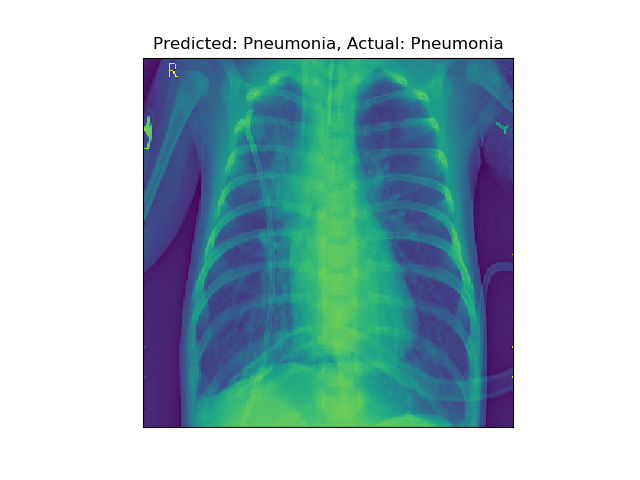


Our first layer generated the two feature maps (one for each filter) on the right.

## Patterns

What patterns characterize each feature map? What aspects of the X-ray are visible in the first feature map? What about the second?


The first filter appears to capture the texture of the lungs. In contrast, the second filter primarily responds to the vertical edges of the ribcage.


## Learned Filters
And here are the filters that produced each feature map. Darker squares correspond to more negative weights, while whiter squares are more positive:

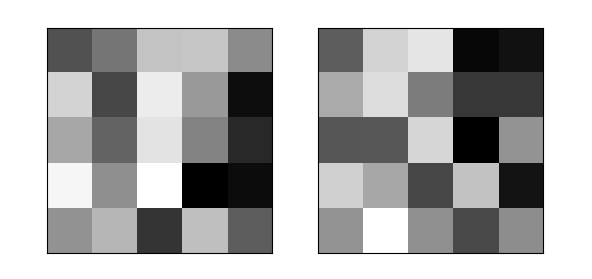

Two filters, side by side. The images are very pixelated, but have darker patched on the right.

Is it possible to connect these raw weights to their resulting feature maps?

It is exceedingly hard to connect the raw filter weights to the resulting feature maps. However, there is at least one notable characteristic.


Do you see the darkened right side on both filters (especially the second)? This contrast accounts for why the filters produce large values along the vertical edges of the ribcage.


As each filter moves off the edge of the ribcage, it encounters the dark background. When the dark side of the filter is over this dark background, its negative weights are canceled out, resulting in a brighter activation.


## First vs. Second Layer Features
Now, compare the feature maps generated by our first layer to the feature maps in our second:

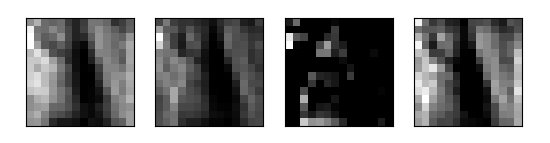

(Second layer feature maps. All four are very blurry. No clear patterns are discernible)


- Why are there more feature maps?
- What seems to change as we go deeper into the network?
 
Our second layer has four feature maps, because we used four filters.
In the first layers, our filters tend to pick up on lower-level features like vertical and horizontal edges. As we move deeper into the network, we generally see the image representation becoming more blurry, abstract, and less interpretable (for us humans).






